In [1]:
# Import the required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load the train and test data set
train = pd.read_csv("C:/Users/ASUS/Desktop/train.csv")
test = pd.read_csv("C:/Users/ASUS/Desktop/test.csv")

In [3]:
# Check number of rows and columns in train data set
train.shape

(8523, 12)

In [4]:
# Print the name of columns in train data set
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [5]:
# Check number of rows and columns in test data set
test.shape

(5681, 11)

In [6]:
# Print the name of columns in test data set
test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [7]:
# Combine test and train into one file to perform EDA
train["source"] = "train"
test["source"] = "test"
data = pd.concat([train,test],ignore_index=True)
data.shape

(14204, 13)

In [8]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [9]:
# Describe function for numerical data summary
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [10]:
# Checking for missing values
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [11]:
# The column Item_Weight has two thousand four hundred thirty nine (2439) missing values and Outlet_Size has around (4016).
# Item_Outlet_Sales has (5681) missing values, which we will predict using the model
# Print the unique values in the Item_Fat_Content column, where there are only two unique types of fat content in items: low fat and regular
data["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [12]:
# Print the unique values in the Outlet_Establishment_Year column, where the date ranges from 1985 to 2009
data["Outlet_Establishment_Year"].unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004], dtype=int64)

In [13]:
# Calculate the Outlet_Age
data["Outlet_Age"] = 2018 - data["Outlet_Establishment_Year"]
data.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,19
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,9


In [14]:
# Unique values in Outlet_Size
data["Outlet_Size"].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [15]:
# Printing the count value of Item_Fat_Content column
data["Item_Fat_Content"].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [16]:
# Print the count value of Outlet_Size
data["Outlet_Size"].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [17]:
# Use the mode function to find out the most common value in Outlet_Size
data["Outlet_Size"].mode()[0]

'Medium'

In [18]:
# Two varialbles with missing values - Item_Weight and Outlet_Size
# Replasing missing values in Outlet_Size with the values "medium"
data["Outlet_Size"] = data["Outlet_Size"].fillna(data["Outlet_Size"].mode()[0])

In [19]:
# Replace missing values in Item_Weight with the mean weight
data["Item_Weight"] = data["Item_Weight"].fillna(data["Item_Weight"].mean())

<Axes: >

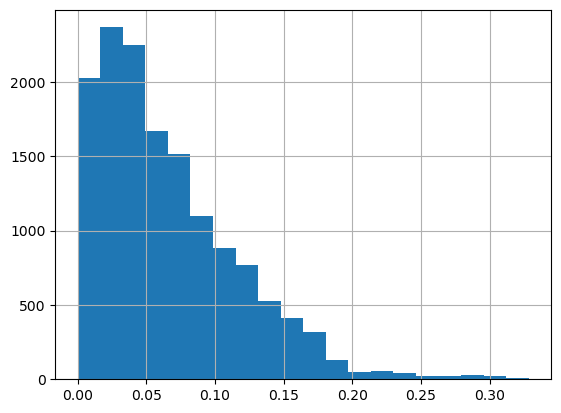

In [20]:
# Plot a histogram to reveal the distribution of Item_Visibility column
data["Item_Visibility"].hist(bins=20)

In [21]:
# Detecting outliers
# An outlier is a data point that lies outside the overall pattern in a distribution.
# A commonly used rule states that a data point is an outlier if it is more than 1.5*IQR above the third quartile or below the first quartile
# Using this, one can remove the outliers and output the resulting data in fill_data variable.
# Calculate first quantile for Item_Visibility
Q1 = data['Item_Visibility'].quantile(0.25)

In [22]:
# Calculate third quantile for Item_Visibility 
Q3 = data['Item_Visibility'].quantile(0.75)

In [23]:
# Calculate the inter quantile range (IQR) for Item_Visibility 
IQR = Q3 - Q1

In [24]:
# Now that the IQR range is known, remove the outliers from the data
# The resulting data is stored in fill_data variale
fill_data = data.query('(@Q1 - 1.5 * @IQR) <= Item_Visibility <= (@Q3 + 1.5 * @IQR)')

In [25]:
# Display the data
fill_data.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,19
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,9


In [26]:
# Check the shape of the resulting dataset without the outliers
fill_data.shape

(13943, 14)

In [27]:
# Shape of the original dataset is (14204) rows and fourteen columns with outliers
data.shape

(14204, 14)

In [28]:
# Assign fill_data dataset to DataFrame
data = fill_data

In [29]:
data.shape

(13943, 14)

In [30]:
# Modify Item_Visibility by converting the numerical values into the categories Low Visibility, Visibility and High Visibility
data['Item_Visibility_bins'] = pd.cut(data['Item_Visibility'], [0.000, 0.005, 0.13, 0.2], labels = ['Low Viz', 'Viz', 'High Viz'])

In [31]:
# Print the count of Item_Visibility_bins
data['Item_Visibility_bins'].value_counts()

Viz         11638
High Viz     1418
Low Viz         8
Name: Item_Visibility_bins, dtype: int64

In [32]:
# Replace null values with Low Visibility
data['Item_Visibility_bins'] = data['Item_Visibility_bins'].replace(np.nan, "Low Viz", regex = True)

In [33]:
# We found types and differences in representation in categories of Item_Fat_Content variable
# This can be corrected using the code on screen
# Replace all representations of low fat with Low Fat 
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace(['low fat', 'LF'], 'Low Fat')

In [34]:
# Replace all representations of reg with Regular
data['Item_Fat_Content'] = data["Item_Fat_Content"].replace("reg", "Regular")

In [35]:
# Print unique fat count values
data["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [36]:
# Code all categorical variables as numeric using LabelEncoder from sklearn's preprocessing module
# Initialize the label encoder
le = LabelEncoder()

In [37]:
# Transform Item_Fat_Content
data["Item_Fat_Content"] = le.fit_transform(data["Item_Fat_Content"])

In [38]:
# Transform Item_Visibility_bins
data["Item_Visibility_bins"] = le.fit_transform(data["Item_Visibility_bins"])

In [39]:
# Transform Outlet_Size
data["Outlet_Size"] = le.fit_transform(data["Outlet_Size"])

In [40]:
# Transform Outlet_Location_Type
data["Outlet_Location_Type"] = le.fit_transform(data["Outlet_Location_Type"])

In [41]:
# Print the uniqe values of Outlet_Type
data["Outlet_Type"].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [42]:
# Create dummies for Outlet_Type
dummy = pd.get_dummies(data["Outlet_Type"])
dummy.head()

,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,1,0,0,0
4,0,1,0,0


In [43]:
# Explore the column Item_Identifier
data["Item_Identifier"]

0        FDA15
1        DRC01
2        FDN15
3        FDX07
4        NCD19
         ...  
14199    FDB58
14200    FDD47
14201    NCO17
14202    FDJ26
14203    FDU37
Name: Item_Identifier, Length: 13943, dtype: object

In [44]:
# As there are multiple values of Food, nonconsumable items, and drinks with different numbers, combine the item type.
data["Item_Identifier"].value_counts()

FDE33    10
FDM12    10
FDY47    10
FDT03    10
FDO01    10
         ..
FDA10     7
FDO33     7
FDZ60     7
NCW54     7
FDG21     7
Name: Item_Identifier, Length: 1559, dtype: int64

In [45]:
# As multiple categories are present in Item_Identifier, reduce this by mapping
data["Item_Type_Combined"] = data["Item_Identifier"].apply(lambda x: x[0:2])
data["Item_Type_Combined"] = data["Item_Type_Combined"].map({'FD': 'Food',
                                                            'NC': 'Non-Consumable',
                                                            'DR': 'Drinks'})

In [46]:
# Only three categories are present in an Item_Type_Combined column
data["Item_Type_Combined"].value_counts()

Food              9991
Non-Consumable    2652
Drinks            1300
Name: Item_Type_Combined, dtype: int64

In [47]:
data.shape

(13943, 16)

In [48]:
# Perform one-hot encoding for all columns as the model works on neumerical values and not on categorical values
data = pd.get_dummies(data, columns=["Item_Fat_Content", "Outlet_Location_Type", "Outlet_Size", "Outlet_Type", "Item_Type_Combined"])

In [49]:
data.dtypes

Item_Identifier                       object
Item_Weight                          float64
Item_Visibility                      float64
Item_Type                             object
Item_MRP                             float64
Outlet_Identifier                     object
Outlet_Establishment_Year              int64
Item_Outlet_Sales                    float64
source                                object
Outlet_Age                             int64
Item_Visibility_bins                   int32
Item_Fat_Content_0                     uint8
Item_Fat_Content_1                     uint8
Outlet_Location_Type_0                 uint8
Outlet_Location_Type_1                 uint8
Outlet_Location_Type_2                 uint8
Outlet_Size_0                          uint8
Outlet_Size_1                          uint8
Outlet_Size_2                          uint8
Outlet_Type_Grocery Store              uint8
Outlet_Type_Supermarket Type1          uint8
Outlet_Type_Supermarket Type2          uint8
Outlet_Typ

In [50]:
import warnings
warnings.filterwarnings('ignore')

# Drop the colums which have been converted to different types
data.drop(["Item_Type", "Outlet_Establishment_Year"], axis=1, inplace=True)

# Devide the dataset created earlier into train and test datasets
train = data.loc[data["source"] == "train"]
test = data.loc[data["source"] == "test"]

# Drop unnecessary columns
test.drop(["Item_Outlet_Sales", "source"], axis=1, inplace=True)
train.drop(["source"], axis=1, inplace=True)

# Export modified versions of the files
train.to_csv("trained data/train_modified.csv", index=False)
test.to_csv("trained data/test_modified.csv", index=False)

In [51]:
# read the train_modified.csv and test_modified.csv datasets
train2 = pd.read_csv("trained data/train_modified.csv")
test2 = pd.read_csv("trained data/test_modified.csv")

In [52]:
# Print the data types of train2 column
train2.dtypes

Item_Identifier                       object
Item_Weight                          float64
Item_Visibility                      float64
Item_MRP                             float64
Outlet_Identifier                     object
Item_Outlet_Sales                    float64
Outlet_Age                             int64
Item_Visibility_bins                   int64
Item_Fat_Content_0                     int64
Item_Fat_Content_1                     int64
Outlet_Location_Type_0                 int64
Outlet_Location_Type_1                 int64
Outlet_Location_Type_2                 int64
Outlet_Size_0                          int64
Outlet_Size_1                          int64
Outlet_Size_2                          int64
Outlet_Type_Grocery Store              int64
Outlet_Type_Supermarket Type1          int64
Outlet_Type_Supermarket Type2          int64
Outlet_Type_Supermarket Type3          int64
Item_Type_Combined_Drinks              int64
Item_Type_Combined_Food                int64
Item_Type_

In [53]:
# Drop the irrelevant variables from train2 dataset
# Create the independent variable X_train and dependent variable y_train
X_train = train2.drop(["Item_Outlet_Sales", "Outlet_Identifier", "Item_Identifier"], axis=1)
y_train = train2.Item_Outlet_Sales

In [54]:
# Drop those irrelevent variables from test2 dataset
X_test = test2.drop(["Outlet_Identifier", "Item_Identifier"], axis=1)

In [55]:
X_test

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age,Item_Visibility_bins,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_Combined_Drinks,Item_Type_Combined_Food,Item_Type_Combined_Non-Consumable
0,20.750000,0.007565,107.8622,19,2,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0
1,8.300000,0.038428,87.3198,11,2,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0
2,14.600000,0.099575,241.7538,20,2,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1
3,7.315000,0.015388,155.0340,11,2,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0
4,12.792854,0.118599,234.2300,33,2,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5563,10.500000,0.013496,141.3154,21,2,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0
5564,7.600000,0.142991,169.1448,9,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0
5565,10.000000,0.073529,118.7440,16,2,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1
5566,15.300000,0.000000,214.6218,11,3,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0


In [56]:
X_train.head(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age,Item_Visibility_bins,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_Combined_Drinks,Item_Type_Combined_Food,Item_Type_Combined_Non-Consumable
0,9.30,0.016047,249.8092,19,2,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0
1,5.92,0.019278,48.2692,9,2,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0


In [57]:
y_train.head(2)

0    3735.1380
1     443.4228
Name: Item_Outlet_Sales, dtype: float64

In [58]:
# Import sklearn libraries for model selection
from sklearn import model_selection
from sklearn.linear_model import LinearRegression

In [59]:
# Create a train and test split
xtrain, xtest, ytrain, ytest = model_selection.train_test_split(X_train, y_train, test_size=0.3,random_state=42)

In [60]:
# Fit linear regression to the training dataset
lin = LinearRegression()

In [61]:
lin.fit(xtrain, ytrain)

LinearRegression()

In [62]:
# Find the coefficient and intercept of the line
# Use xtrain and ytrain for linear regression
print(lin.coef_)
lin.intercept_

[-1.91920052e+00 -4.98133267e+02  1.58787200e+01 -3.19561820e+01
 -1.52236250e+01 -1.53256381e+00  1.53256381e+00  1.88893424e+02
  4.81188112e+01 -2.37012235e+02  5.39758411e+02 -3.11490355e+02
 -2.28268056e+02 -1.63493586e+03 -1.26272350e+02 -3.49024312e+02
  2.11023253e+03  8.94783708e+00  3.47098642e+01 -4.36577013e+01]


977.8294744860896

In [63]:
# Predict the test set results of training data
predictions = lin.predict(xtest)
predictions

array([2073.26589413, 3706.0694641 , 2964.82220721, ..., 3541.33410247,
       3473.29831873, 1246.04199253])

In [64]:
import math

In [65]:
# Find the RMSE for the model
print(math.sqrt(mean_squared_error(ytest,predictions)))

1126.2734239132767


In [66]:
# A good RMSE for this problem is 1130. Here we can improve the RMSE by using algorithms like decision tree, random forest and XGboost.
# Next, we will predict the sales of each product at a particular store in test data.
# Predict the column Item_Outlet_Sales of test dataset
y_sales_pred = lin.predict(X_test)
y_sales_pred

array([1793.64474848, 1593.917941  , 1840.74885933, ..., 1830.93285159,
       3605.7948284 , 1279.34319025])

In [67]:
test_predictions = pd.DataFrame({
    'Item_Identifier': test2['Item_Identifier'],
    'Outlet_Identifier': test2['Outlet_Identifier'],
    'Item_Outlet_Sales': y_sales_pred
}, columns = ['Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales'])

In [68]:
test_predictions

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1793.644748
1,FDW14,OUT017,1593.917941
2,NCN55,OUT010,1840.748859
3,FDQ58,OUT017,2679.434681
4,FDY38,OUT027,5126.442849
...,...,...,...
5563,FDB58,OUT046,2363.930870
5564,FDD47,OUT018,2428.927833
5565,NCO17,OUT045,1830.932852
5566,FDJ26,OUT017,3605.794828
